In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from scipy import stats
import scipy.stats as scs
import datetime

In [2]:
du=xr.open_dataset('uwind_Ind-Pac.nc')
du_IND = du.sel(longitude=slice(30,120),latitude=slice(30,-30),time=slice('1980-01-01T00:00:00.000000000','2022-12-01T00:00:00.000000000'))
du_IND

C:\Users\DELL\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [3]:
du_200IND=du_IND.isel(level=0,expver=0)
du_850IND=du_IND.isel(level=2,expver=0)
du_850IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
    level      int32 850
    expver     int32 1
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [4]:
du_200IND = du_200IND.drop(['level','expver'])
du_850IND = du_850IND.drop(['level','expver'])

In [5]:
du_200IND_Jun_TS=du_200IND.groupby('time.month')[6]
du_850IND_Jun_TS=du_850IND.groupby('time.month')[6]
du_850IND_Jun_TS

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-06 06:07:06 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [6]:
du_200IND_Jun_Clm=du_200IND_Jun_TS.mean('time')
du_850IND_Jun_Clm=du_850IND_Jun_TS.mean('time')
du_200IND_Jun_Clm

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Data variables:
    u          (latitude, longitude) float32 23.3 23.24 23.17 ... 49.06 49.04

In [11]:
# du_200IND_Jun_Anm = du_200IND_Jun_TS - du_200IND_Jun_Clm
# du_850IND_Jun_Anm = du_850IND_Jun_TS - du_850IND_Jun_Clm
# du_850IND_Jun_Anm

<xarray.Dataset>
Dimensions:    (longitude: 401, latitude: 241, time: 43)
Coordinates:
  * longitude  (longitude) float32 20.0 20.25 20.5 20.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * time       (time) datetime64[ns] 1980-06-01 1981-06-01 ... 2022-06-01
Data variables:
    u          (time, latitude, longitude) float32 -0.7215 -0.7673 ... -0.2943

In [7]:
du1_200IND_Jun_Clm=du_200IND_Jun_Clm.astype('float64')
du1_850IND_Jun_Clm=du_850IND_Jun_Clm.astype('float64')
du1_200IND_Jun_Clm

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Data variables:
    u          (latitude, longitude) float64 23.3 23.24 23.17 ... 49.06 49.04

In [8]:
du1_850IND_Jun_Clm

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Data variables:
    u          (latitude, longitude) float64 2.293 2.164 1.965 ... 2.914 2.965

In [13]:
u200 = du1_200IND_Jun_Clm.u
u200

<xarray.DataArray 'u' (latitude: 241, longitude: 361)>
array([[23.29713058, 23.23807716, 23.1724205 , ..., 21.84121704,
        21.88592911, 21.94989204],
       [22.74830437, 22.68542671, 22.61543655, ..., 20.94472885,
        20.99928665, 21.08466339],
       [22.18666267, 22.11799431, 22.04306602, ..., 20.05009079,
        20.11995888, 20.2185173 ],
       ...,
       [34.19365311, 34.22812271, 34.20481873, ..., 49.66175842,
        49.64130783, 49.62606812],
       [34.16331482, 34.19252396, 34.17581558, ..., 49.39379883,
        49.37375259, 49.3554306 ],
       [34.11047745, 34.13446808, 34.13539505, ..., 49.07836914,
        49.06044388, 49.03968048]])
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0

In [15]:
u850 = du1_850IND_Jun_Clm.u
u850

<xarray.DataArray 'u' (latitude: 241, longitude: 361)>
array([[2.29286718, 2.16353512, 1.96473551, ..., 2.92032242, 2.92277336,
        2.8754034 ],
       [2.12038398, 1.9258033 , 1.69245076, ..., 2.91333127, 2.85185957,
        2.94900918],
       [1.88582647, 1.68546045, 1.49525881, ..., 2.96062016, 2.96572304,
        3.18762422],
       ...,
       [0.25629872, 0.70817745, 1.09749937, ..., 2.50966549, 2.50122857,
        2.53007603],
       [0.16159984, 0.72075313, 0.9999882 , ..., 2.68978214, 2.69970608,
        2.73968339],
       [0.51532429, 0.94229287, 1.20316684, ..., 2.89263988, 2.91369271,
        2.96507955]])
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0

In [16]:
dv=xr.open_dataset('vwind_Ind-Pac.nc')
dv

<xarray.Dataset>
Dimensions:    (longitude: 1440, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [17]:
dv_IND=dv.sel(longitude=slice(30,120),latitude=slice(30,-30))
dv_IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, level: 3, expver: 2, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
  * level      (level) int32 200 500 850
  * expver     (expver) int32 1 5
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, expver, level, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [18]:
dv_200IND=dv_IND.isel(level=0,expver=0)
dv_850IND=dv_IND.isel(level=2,expver=0)
dv_850IND

<xarray.Dataset>
Dimensions:    (longitude: 361, latitude: 241, time: 516)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
    level      int32 850
    expver     int32 1
  * time       (time) datetime64[ns] 1980-01-01 1980-02-01 ... 2022-12-01
Data variables:
    v          (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2023-03-05 14:47:57 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...

In [19]:
dv_200IND = dv_200IND.drop(['level','expver'])
dv_850IND = dv_850IND.drop(['level','expver'])

In [20]:
dv_200IND_Jun_TS=dv_200IND.groupby('time.month')[6]
dv_850IND_Jun_TS=dv_850IND.groupby('time.month')[6]

dv_200IND_Jun_Clm=dv_200IND_Jun_TS.mean('time')
dv_850IND_Jun_Clm=dv_850IND_Jun_TS.mean('time')

In [21]:
dv1_200IND_Jun_Clm=dv_200IND_Jun_Clm.astype('float64')
dv1_850IND_Jun_Clm=dv_850IND_Jun_Clm.astype('float64')

In [22]:
dv1_850IND_Jun_Clm

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Data variables:
    v          (latitude, longitude) float64 -5.25 -5.244 ... -2.08 -2.042

In [23]:
dv1_200IND_Jun_Clm

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 361)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Data variables:
    v          (latitude, longitude) float64 10.91 11.0 11.09 ... 2.414 2.463

In [24]:
v850 = dv1_850IND_Jun_Clm.v
v850

<xarray.DataArray 'v' (latitude: 241, longitude: 361)>
array([[-5.25041199, -5.24362755, -5.26348591, ...,  2.38008857,
         2.29114151,  2.18721175],
       [-5.52461433, -5.46997356, -5.42357016, ...,  2.50839496,
         2.38667488,  2.28527164],
       [-5.60317516, -5.51297379, -5.41612864, ...,  2.48511338,
         2.41045403,  2.39435601],
       ...,
       [-1.17093813, -1.12710166, -0.56227952, ..., -2.12388325,
        -2.064605  , -2.01668882],
       [-0.87600094, -0.64181423, -0.13336489, ..., -2.13309574,
        -2.08396602, -2.03300548],
       [-0.60410643, -0.24638902,  0.14826018, ..., -2.11984348,
        -2.08046412, -2.04209924]])
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0

In [26]:
v200 = dv1_200IND_Jun_Clm.v
v200

<xarray.DataArray 'v' (latitude: 241, longitude: 361)>
array([[10.91285229, 11.00221729, 11.09000778, ..., -3.4505434 ,
        -3.36997414, -3.29925394],
       [10.88511372, 10.96612072, 11.0497942 , ..., -3.48445034,
        -3.40449739, -3.36203432],
       [10.84883785, 10.92532825, 11.00402737, ..., -3.56388617,
        -3.49607182, -3.45812488],
       ...,
       [-0.4758001 , -0.50986648, -0.53501838, ...,  2.38534141,
         2.43248153,  2.48009896],
       [-0.48379943, -0.48232681, -0.49424633, ...,  2.37509394,
         2.42119908,  2.47003007],
       [-0.48670453, -0.47146222, -0.46953204, ...,  2.36416984,
         2.41355801,  2.46314526]])
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0

In [27]:
lat = dv_200IND.latitude
lat

<xarray.DataArray 'latitude' (latitude: 241)>
array([ 30.  ,  29.75,  29.5 , ..., -29.5 , -29.75, -30.  ], dtype=float32)
Coordinates:
  * latitude  (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0
Attributes:
    units:      degrees_north
    long_name:  latitude

In [28]:
lon = dv_200IND.longitude
lon

<xarray.DataArray 'longitude' (longitude: 361)>
array([ 30.  ,  30.25,  30.5 , ..., 119.5 , 119.75, 120.  ], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
Attributes:
    units:      degrees_east
    long_name:  longitude

In [29]:
lon2D, lat2D = np.meshgrid(lon[::12], lat[::12])

In [30]:
lon2D, lat2D

(array([[ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90.,  93.,
          96.,  99., 102., 105., 108., 111., 114., 117., 120.],
        [ 30.,  33.,  36.,  39.,  42.,  45.,  48.,  51.,  54.,  57.,  60.,
          63.,  66.,  69.,  72.,  75.,  78.,  81.,  84.,  87.,  90., 

In [31]:
wspd200 = np.sqrt(u200**2 + v200**2)
wspd850 = np.sqrt(u850**2 + v850**2) 

In [36]:
wspd850

<xarray.DataArray (latitude: 241, longitude: 361)>
array([[5.72922909, 5.67243458, 5.61822655, ..., 3.7673737 , 3.71374926,
        3.61273304],
       [5.91754947, 5.79908003, 5.68150533, ..., 3.8444173 , 3.71877937,
        3.73083391],
       [5.91201433, 5.764864  , 5.61874081, ..., 3.86536677, 3.82175376,
        3.98671404],
       ...,
       [1.19865973, 1.33111737, 1.23315171, ..., 3.28775013, 3.24326042,
        3.2354781 ],
       [0.89078177, 0.96509615, 1.0088422 , ..., 3.43293248, 3.41047317,
        3.4115944 ],
       [0.79404263, 0.973973  , 1.2122671 , ..., 3.58623784, 3.58021455,
        3.60025916]])
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0

In [37]:
wspd200

<xarray.DataArray (latitude: 241, longitude: 361)>
array([[25.72638021, 25.71102907, 25.68947926, ..., 22.11210102,
        22.14386187, 22.19646002],
       [25.21846649, 25.19691229, 25.17053679, ..., 21.2325943 ,
        21.27347274, 21.35102586],
       [24.69707034, 24.66918056, 24.63707324, ..., 20.36436656,
        20.42144127, 20.51212007],
       ...,
       [34.19696329, 34.23192002, 34.20900274, ..., 49.71901149,
        49.7008693 , 49.68800185],
       [34.16674028, 34.19592569, 34.17938926, ..., 49.45086889,
        49.43308255, 49.41719922],
       [34.11394954, 34.13772382, 34.1386241 , ..., 49.13527874,
        49.11977622, 49.10150045]])
Coordinates:
  * longitude  (longitude) float32 30.0 30.25 30.5 30.75 ... 119.5 119.8 120.0
  * latitude   (latitude) float32 30.0 29.75 29.5 29.25 ... -29.5 -29.75 -30.0

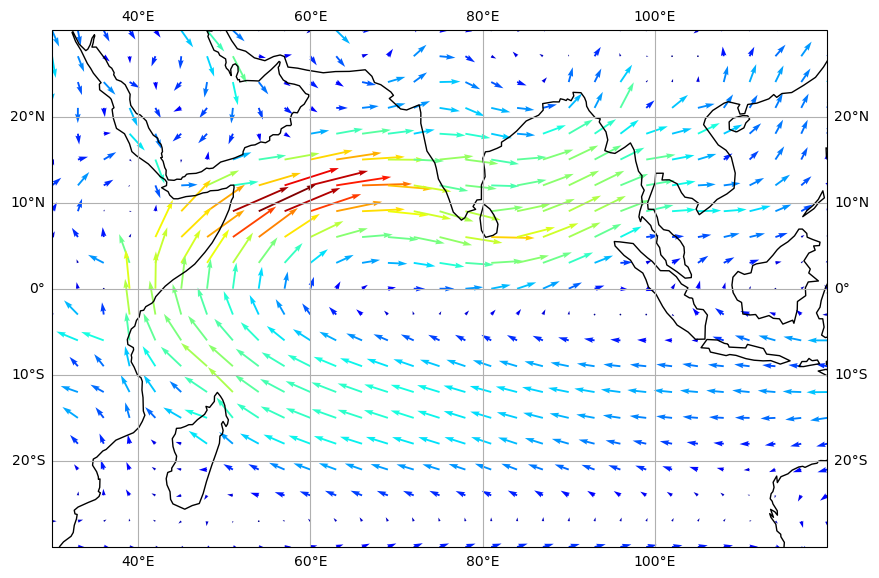

In [34]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([30,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, u850[::12,::12], v850[::12,::12], wspd850[::12,::12],angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

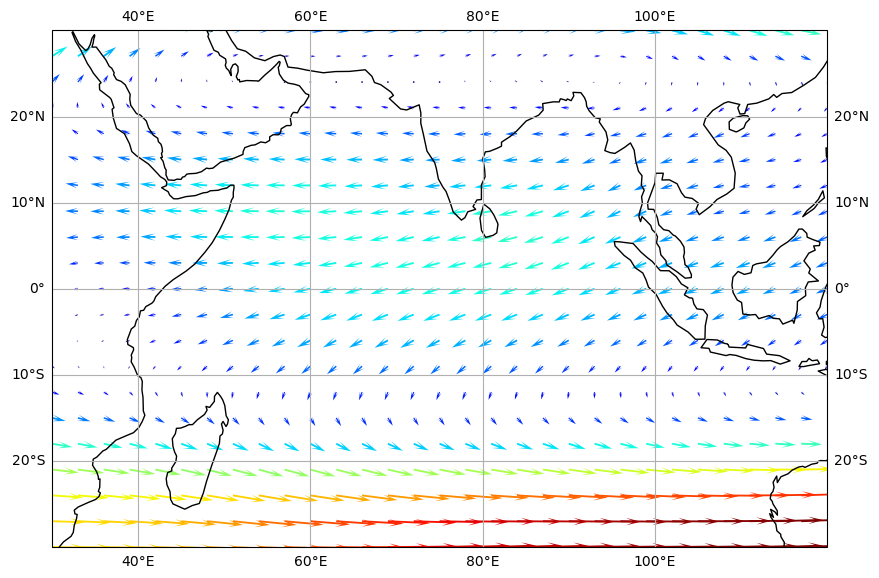

In [39]:
reg_v850_onsetprojection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([30,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, u200[::12,::12], v200[::12,::12], wspd200[::12,::12],angles = 'xy',cmap='jet', 
          transform=ccrs.PlateCarree(),  headwidth=4, headlength=8)

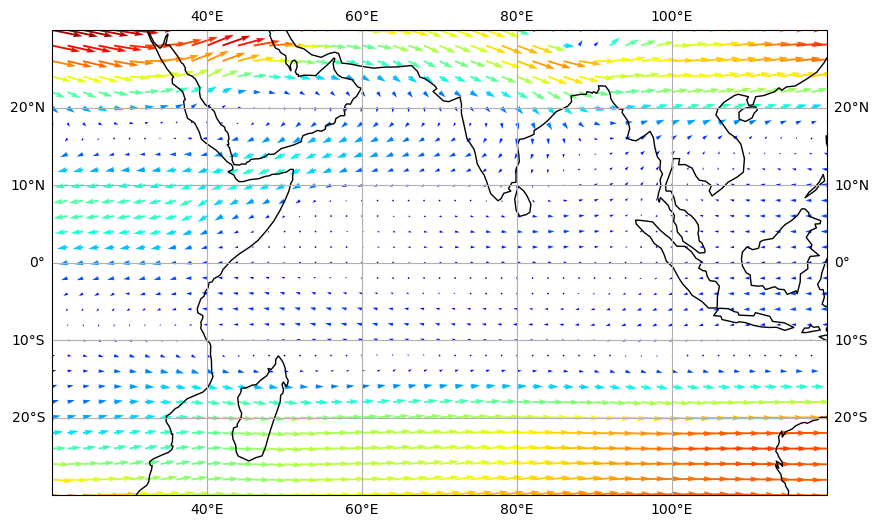

In [34]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon2D, lat2D, u850[::8,::8], v850[::8,::8], wspd850[::8,::8],cmap='jet', transform=ccrs.PlateCarree())

In [40]:
# projection = ccrs.PlateCarree()
# crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
# crs180 = ccrs.PlateCarree(central_longitude=180)
# fig=plt.figure(1, figsize=[10,10])
# ax=plt.subplot(1,1,1,projection=projection)
# ax.set_extent([20,120,-30,30], crs=crs0)
# ax.coastlines()
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, u, v,wspd, cmap='jet',transform=ccrs.PlateCarree())

# ax.gridlines(crs=crs0, draw_labels=True)

In [41]:
import matplotlib.cm as cm

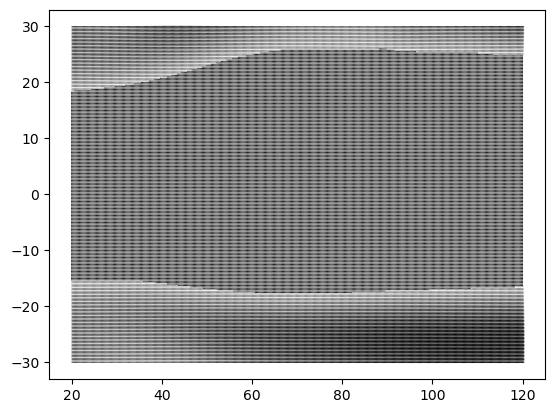

In [68]:
plt.figure()
plt.quiver(lon, lat, u, v,units='xy',cmap='jet')

NameError: name 'reg_u' is not defined

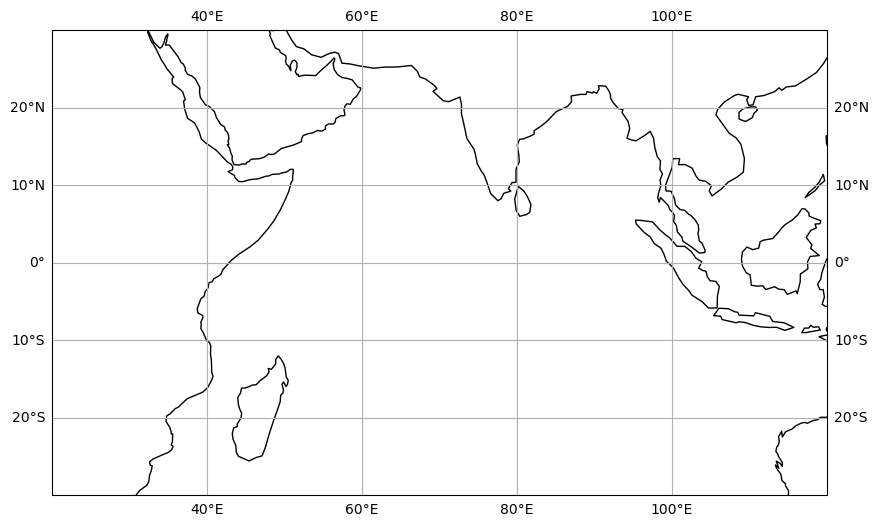

In [58]:
projection = ccrs.PlateCarree()
crs0 = ccrs.PlateCarree(central_longitude=0)     #for coding data, same as ccrs.PlateCarree()
crs180 = ccrs.PlateCarree(central_longitude=180)
fig=plt.figure(1, figsize=[10,10])
ax=plt.subplot(1,1,1,projection=projection)
ax.set_extent([20,120,-30,30], crs=crs0)

ax.coastlines()
ax.gridlines(crs=crs0, draw_labels=True)

# ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.quiver(lon, lat, reg_u, reg_v, wspd, angles = 'xy',cmap='jet', transform=ccrs.PlateCarree())

In [45]:
conda install -c conda-forge metpy

Retrieving notices: ...working... done
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\DELL\anaconda3

  added / updated specs:
    - metpy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    importlib_resources-5.12.0 |     pyhd8ed1ab_0          30 KB  conda-forge
    metpy-1.4.0                |     pyhd8ed1ab_0         316 KB  conda-forge
    pint-0.20.1                |     pyhd8ed1ab_0         207 KB  conda-forge
    pooch-1.7.0                |     pyhd8ed1ab_0          49 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         603 KB

The following NEW packages will be INSTALLED:

  importlib_resourc~ conda-forge/noarch::importlib_resources-5.12.0-pyhd8ed1ab_0 
  metpy              conda-forge/noarch::metpy-1.4.0-pyhd8ed1ab_0 
  pint               conda-fo